In [1]:
%pylab
%matplotlib inline
import scipy as sp
import librosa
import sounddevice

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%store -r song_data
song, fs = song_data
a = song[1000000:1100000]

In [3]:
win = int(0.03*fs)
overlap = int(0.02*fs)

In [10]:
_, _, s = sp.signal.stft(a, nfft=2048, nperseg=win, noverlap=overlap)

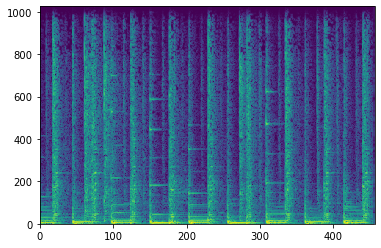

In [14]:
plt.pcolormesh(np.log(abs(s)+10e-5))

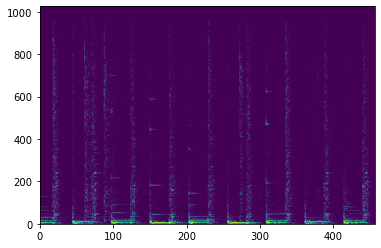

In [21]:
sxx = s*s.conjugate()
plt.pcolormesh(np.log(abs(sxx)+10e-5))

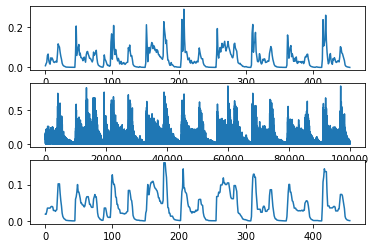

In [34]:
_, axs = subplots(3, 1)
axs[0].plot(np.sum(abs(sxx), axis=0))
axs[1].plot(abs(a))
axs[2].plot(sp.ndimage.median_filter(np.sum(abs(sxx), axis=0), 5))

In [23]:
_, rxx = sp.signal.istft(sxx, nfft=2048, nperseg=win, noverlap=overlap)
rxx.shape

(100101,)

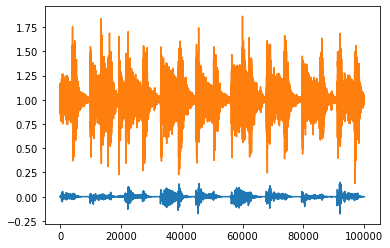

In [27]:
plot(rxx*10)
plot(a+1)